<a href="https://colab.research.google.com/github/monikaboobalan/internsavy_task3/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [6]:
data = pd.read_csv('/content/drive/MyDrive/Mall_Customers3.csv')


In [7]:
# Explore the dataset
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# Preprocessing
data.drop('CustomerID', axis=1, inplace=True)  # Remove unnecessary column

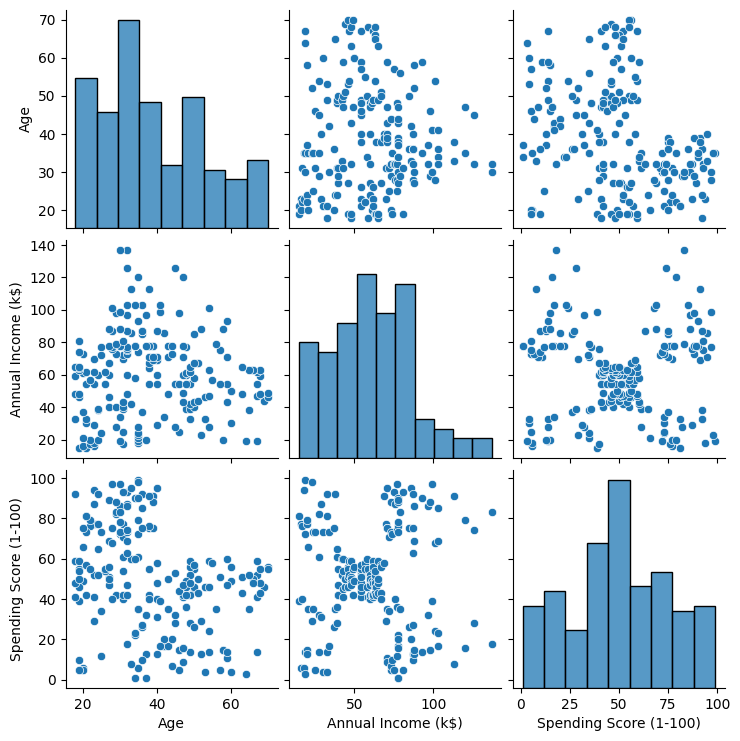

In [9]:
# EDA with Visualization
# Pairplot
sns.pairplot(data)
plt.show()



<ipython-input-10-feacef4fc519>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


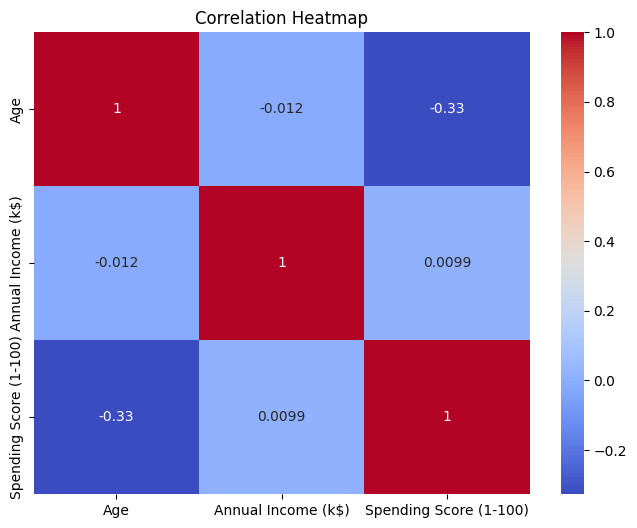

In [10]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variable
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [16]:

# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [19]:
# Customer Segmentation Analysis
# Determine optimal number of clusters using the Elbow method
inertia = []
silhouette_scores = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

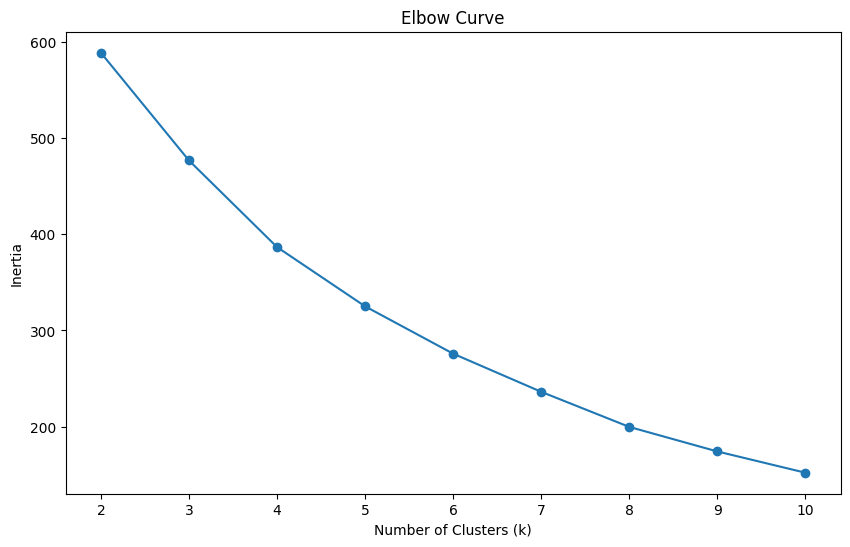

In [20]:
# Plotting the Elbow curve and Silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()


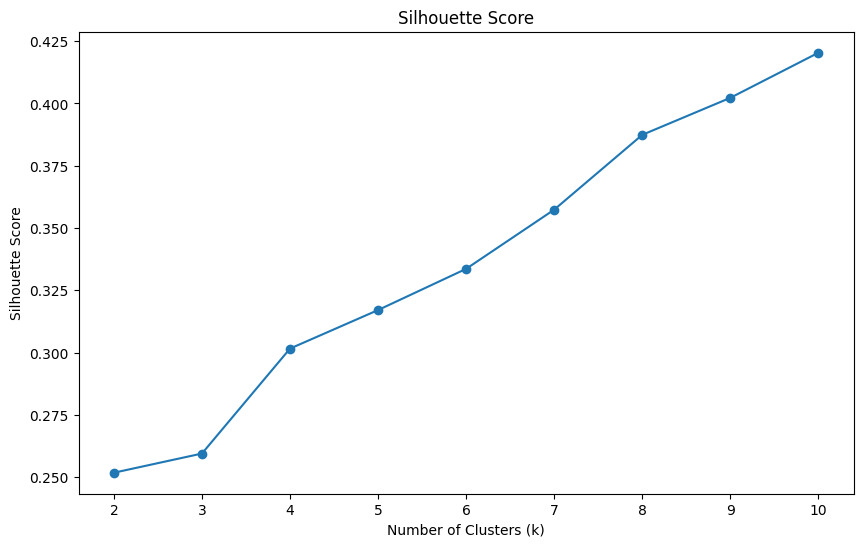

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

In [22]:
# Clustering using K-Means with the optimal number of clusters
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [23]:
# Add cluster labels to the dataset
data['Cluster'] = kmeans.labels_

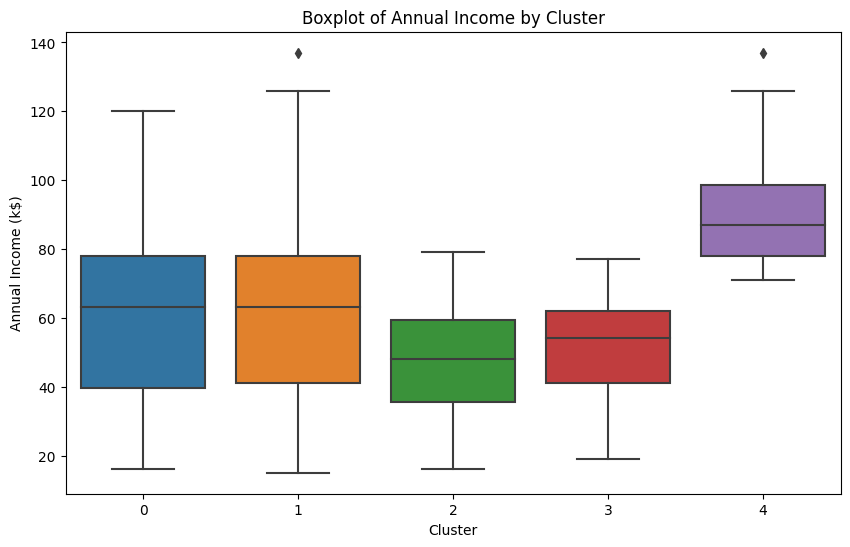

In [24]:
# EDA with Customer Segmentation Visualization
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=data)
plt.title('Boxplot of Annual Income by Cluster')
plt.show()


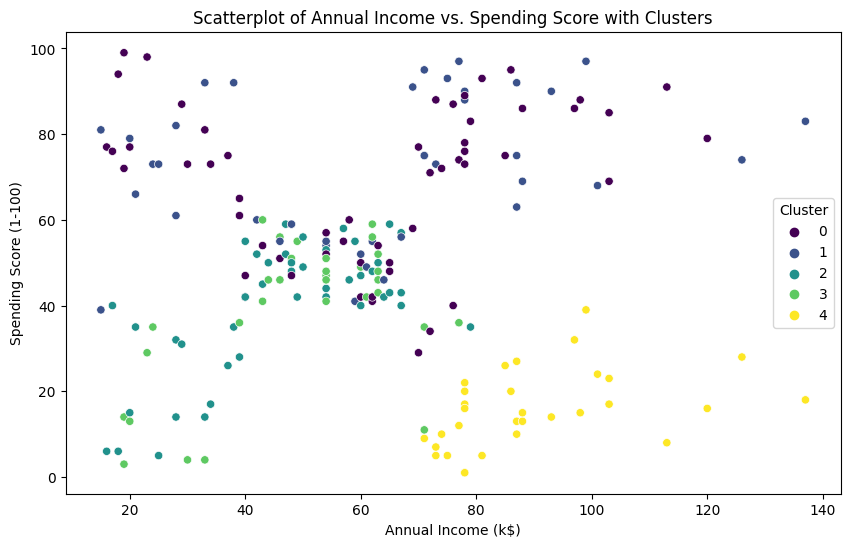

In [25]:
# Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis')
plt.title('Scatterplot of Annual Income vs. Spending Score with Clusters')
plt.show()

In [26]:
# Silhouette Score
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
print('Silhouette Score:', silhouette_avg)


Silhouette Score: 0.31709067955763137


In [27]:
# Customer Segmentation Analysis
segment_counts = data['Cluster'].value_counts()
print('Customer Segmentation Analysis:')
for segment, count in segment_counts.iteritems():
    print('Segment {}: {} customers'.format(segment, count))

Customer Segmentation Analysis:
Segment 0: 55 customers
Segment 2: 43 customers
Segment 1: 40 customers
Segment 3: 31 customers
Segment 4: 31 customers


<ipython-input-27-428d46a7c74c>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for segment, count in segment_counts.iteritems():
